# I590 Python Final Project
## Andrew Doto, Greg Platt, Thomas Kirnbauer

# Phase 1 Solutions

### Questions 1 -> 4

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

##Note: this prints the dataframe at the end of each step, if you don't want to see every step, you can comment out 
##lines reading print(df) without impacting the program

##Step 1: import data and create dataframe
data = pd.read_csv('Breast-Cancer-Wisconsin.csv')

df = pd.DataFrame(data)
df.head()

##print(df)

##Step 2: replace ? with Nan
df['A7'] = df['A7'].replace('?', np.NaN)

##print(df)
print(df.dtypes)

##Step 3: change A7 datatype to numeric

df['A7'] = pd.to_numeric(df['A7'])

##print(df)
##print(df.dtypes)

##Step 4: Count NaN
print("Number of NaN entries by column:")
print(df.isnull().sum())

##Step 5: Calculate Column Means
print(df.mean(skipna='True'))

##Step 6: Replace NaN with Column Mean
df.fillna(value=(round(df.mean(skipna='True'),2)), inplace=True)

Scn       int64
A2        int64
A3        int64
A4        int64
A5        int64
A6        int64
A7       object
A8        int64
A9        int64
A10       int64
CLASS     int64
dtype: object
Number of NaN entries by column:
Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64
Scn      1.071704e+06
A2       4.417740e+00
A3       3.134478e+00
A4       3.207439e+00
A5       2.806867e+00
A6       3.216023e+00
A7       3.544656e+00
A8       3.437768e+00
A9       2.866953e+00
A10      1.589413e+00
CLASS    2.689557e+00
dtype: float64


### Questions 5 - 8

The summary statistics for the dataframe:
       count        mean        std      min       25%        50%        75%  \
Scn    699.0  1071704.10  617095.73  61634.0  870688.5  1171710.0  1238298.0   
A2     699.0        4.42       2.82      1.0       2.0        4.0        6.0   
A3     699.0        3.13       3.05      1.0       1.0        1.0        5.0   
A4     699.0        3.21       2.97      1.0       1.0        1.0        5.0   
A5     699.0        2.81       2.86      1.0       1.0        1.0        4.0   
A6     699.0        3.22       2.21      1.0       2.0        2.0        4.0   
A7     699.0        3.54       3.60      1.0       1.0        1.0        5.0   
A8     699.0        3.44       2.44      1.0       2.0        3.0        5.0   
A9     699.0        2.87       3.05      1.0       1.0        1.0        4.0   
A10    699.0        1.59       1.72      1.0       1.0        1.0        1.0   
CLASS  699.0        2.69       0.95      2.0       2.0        2.0        4.0  

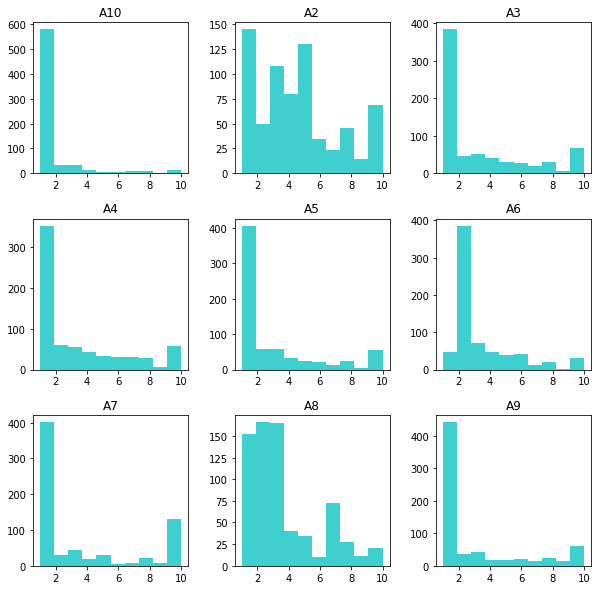

In [2]:
#step 5,6 - summary statistics
print('The summary statistics for the dataframe:')
print(df.describe().transpose().round(2))
print('\nThe number of rows in the dataframe:', len(df))
print('The number of columns in the dataframe:', len(df.columns))

#step 7 - unique ID values
print('The number of unique ID values:', df['Scn'].nunique())

#step 8 - histograms for relevant columns
import matplotlib.pyplot as plt
hist = df.loc[:, 'A2':'A10'].hist(grid=False, figsize=(10,10), layout=(3,3), alpha = .75, color='c')
plt.show()

### Bar Chart

Replace the 2 and 4 values with the categories that they represent, and then plot a bar chart

Text(0,0.5,'Count')

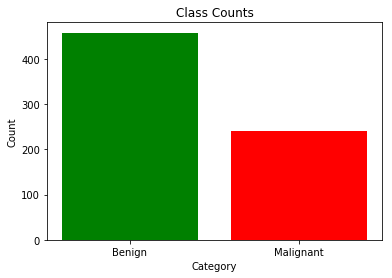

In [3]:
class_counts = df.groupby(['CLASS'], as_index=False).count()
class_counts['CLASS'] = class_counts['CLASS'].replace(2, 'Benign').replace(4,'Malignant')
barx = class_counts['CLASS']
bary = class_counts['Scn']
plt.bar(barx,bary,color=['green', 'red'])
plt.title('Class Counts')
plt.xlabel('Category')
plt.ylabel('Count')

### Scatterplot

Select two columns and create a scatterplot

Text(0,0.5,'Mitoses')

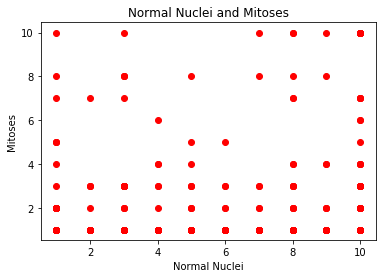

In [4]:
scatterx = df['A9']
scattery = df['A10']
plt.scatter(scatterx, scattery, color='red')
plt.title('Normal Nuclei and Mitoses')
plt.xlabel('Normal Nuclei')
plt.ylabel('Mitoses')

### Summary

Explore descriptive statistics and correlation matrix of the dataset

In [5]:
df.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544549,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df.corr()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
Scn,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098658,-0.060051,-0.052072,-0.034901,-0.080226
A2,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587311,0.558428,0.535835,0.350034,0.716001
A3,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686808,0.755721,0.722865,0.458693,0.817904
A4,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709609,0.735948,0.719446,0.438911,0.818934
A5,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665059,0.666715,0.603352,0.417633,0.696800
A6,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581272,0.616102,0.628881,0.479101,0.682785
A7,-0.098658,0.587311,0.686808,0.709609,0.665059,0.581272,1.000000,0.675899,0.577363,0.338750,0.816064
A8,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675899,1.000000,0.665878,0.344169,0.756616
A9,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577363,0.665878,1.000000,0.428336,0.712244
A10,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338750,0.344169,0.428336,1.000000,0.423170


According the exploratory analysis, the dataset has a considerable amount of collinearity. This suggests that we need to think about using some form of dimension reduction to find the most relevant variables. 

# Phase 2 Solutions

### Part 1 (Use KMeans Algorithm)

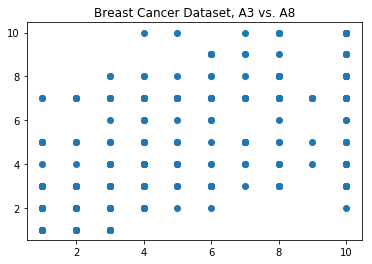

In [7]:
#use correlations high values high correlation between columns (closer to one)
f1 = df['A3'].values
f2 = df['A8'].values

#Make a scater plot with two highly correlated features
plt.scatter(f1,f2)
plt.title('Breast Cancer Dataset, A3 vs. A8')
plt.show()


The KMeans model fit to Breast Cancer dataset: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


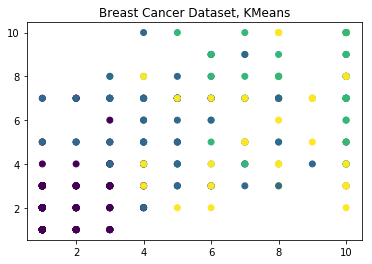

In [8]:
#run the kmeans
from sklearn.cluster import KMeans
import numpy as np

# run KMeans with 4 clusters
model = KMeans(n_clusters=4)

# create an array with the dataframe columns A2 - A10
points = np.array(df.iloc[:,1:10])

# fit kmeans object to df
model.fit(points)
print('The KMeans model fit to Breast Cancer dataset:', model.fit(points))
labels = model.predict(points)


#make a scatter plot with labels
plt.scatter(f1,f2,c=labels)
plt.title('Breast Cancer Dataset, KMeans')
plt.show()



The centroids are:
 [[2.96936543 1.26039387 1.38512035 1.31291028 2.05251641 1.35115974
  2.07658643 1.21006565 1.08315098]
 [7.24742268 4.83505155 5.02061856 4.7628866  4.08247423 9.22206186
  5.24742268 3.79381443 1.64948454]
 [6.72151899 8.36708861 8.40506329 7.72151899 6.73417722 9.3164557
  7.36708861 7.73417722 3.73417722]
 [7.53030303 7.34848485 6.93939394 4.39393939 5.78787879 3.47909091
  5.5        7.15151515 2.43939394]]


Text(0.5,1,'Breast Cancer Dataset, KMeans with Centriods')

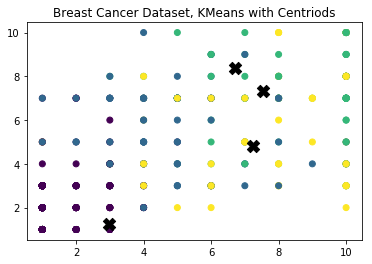

In [9]:
#Calculate Centriods
centroids = model.cluster_centers_
print('The centroids are:\n', centroids)

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(f1,f2,c=labels)
plt.scatter(centroids_x,centroids_y, marker = 'X', s=150, c='black')
plt.title('Breast Cancer Dataset, KMeans with Centriods')

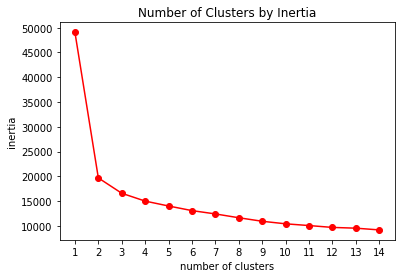

In [10]:
# Instantiate the k range and the inertia variables
k_range = range(1, 15)
inertia_list = []

# loop through the ks range and append the inertias to a list
for k in k_range:
    model=KMeans(n_clusters=k)
    
    # Fit model to points
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertia_list.append(model.inertia_)
    
# Plot k number of clusters by inertia
plt.plot(k_range, inertia_list,'-ro', color='red')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(k_range)
plt.title('Number of Clusters by Inertia')
plt.show()

From the chart above, it appears that the last significant change in inertia occurs from 2 to 3, so the optimal number of clusters is 3.

Text(0.5,1,'Standard Deviation of Columns')

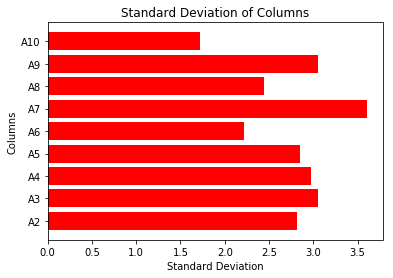

In [11]:
stdevs = df.std(axis=0)
stdevs_new = stdevs[1:10]
ys = stdevs_new.index

plt.barh(ys,stdevs_new, color='red')
plt.xlabel('Standard Deviation')
plt.ylabel('Columns')
plt.title('Standard Deviation of Columns')


According to the chart above, the A7 feature has the most variation, followed by A3 and A9.